In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#credit: https://www.kaggle.com/anthonyleo/hypothesis-testing/data#Hypothesis-Testing

cacao = pd.read_csv("flavors_of_cacao.csv")
cacao.columns = map(lambda x : x.replace("\n", " ") , cacao.columns)
cacao.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [3]:
#I want to test if Venezuelan Broad Bean Origin and Peru Broad Bean Origin have different ratings by chance
#Is that possible? What are some things to consider?

cacao.groupby("Broad Bean Origin").mean().sort_values(by=['Rating'], ascending = False)[["Rating"]].head(15)

,Rating
Broad Bean Origin,
"Ven, Bolivia, D.R.",4.000000
"Dom. Rep., Madagascar",4.000000
"Guat., D.R., Peru, Mad., PNG",4.000000
"Venezuela, Java",4.000000
"Gre., PNG, Haw., Haiti, Mad",4.000000
"Peru, Dom. Rep",4.000000
"Dominican Rep., Bali",3.750000
"Ven.,Ecu.,Peru,Nic.",3.750000
"Peru, Belize",3.750000


In [4]:
grouped = cacao.groupby("Company Location")
counts = grouped.count().sort_values(by=['Rating'], ascending = False)[["Rating"]].rename(columns = {"Rating" : "Count"})

avg_ratings = grouped.mean()[["Rating"]]

switz = avg_ratings.loc["Switzerland", ][0]
belgium = avg_ratings.loc["Belgium", ][0]

switz, belgium
#Null hypothesis? Alternative hypothesis?
#What is a good test statistic?

(3.3421052631578947, 3.09375)

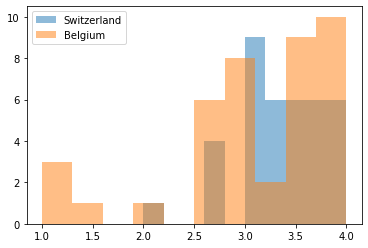

In [5]:
new_cacao = cacao[cacao["Company Location"].isin(["Switzerland", "Belgium"])]
new_cacao = new_cacao[["Company Location", "Rating"]].reset_index()
plt.hist(np.array(new_cacao[new_cacao["Company Location"] == "Switzerland"]["Rating"]), alpha = 0.5, label = "Switzerland")
plt.hist(np.array(new_cacao[new_cacao["Company Location"] == "Belgium"]["Rating"]), alpha = 0.5, label = "Belgium")
plt.legend();

In [6]:
simulations = []
for i in range(10000):
    shuffled = new_cacao["Rating"].sample(n = len(new_cacao))
    shuffled.reset_index(inplace=True, drop=True)
    
    new_cacao["shuffled_ratings"] = shuffled
    
    new_switz = new_cacao[new_cacao["Company Location"] == "Switzerland"]
    new_belgium = new_cacao[new_cacao["Company Location"] == "Belgium"]
    
    test_stat = np.mean(new_switz["shuffled_ratings"]) - np.mean(new_belgium["shuffled_ratings"])
    simulations.append(test_stat)

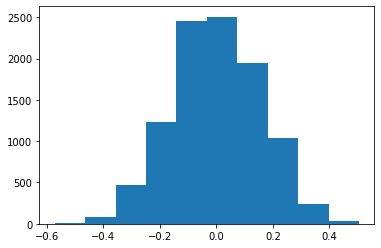

In [7]:
simulations = np.array(simulations)
plt.hist(simulations);
#plt.axvline(x=switz - belgium ,color ='red');

In [8]:
p_value = sum(simulations >= switz - belgium) / len(simulations)
p_value

0.0578

In [9]:
#data source: https://www.kaggle.com/zhangluyuan/ab-testing

df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
#What is the null hypothesis?
#What is the alternative hypothesis?

df_treatment = df[df["group"] == "treatment"]
df_control = df[df["group"] == "control"]

treatment_mean = np.mean(df_treatment["converted"])
control_mean = np.mean(df_control["converted"])

treatment_mean, control_mean

#What is a good test statistic?

(0.11891957956489856, 0.12039917935897611)

In [ ]:
simulations = []
for i in range(1000):
    shuffled = df["converted"].sample(n = len(df))
    shuffled.reset_index(inplace=True, drop=True)
    
    df["shuffled_converted"] = shuffled
    
    df_treatment = df[df["group"] == "treatment"]
    df_control = df[df["group"] == "control"]
    
    test_stat = np.mean(df_treatment["shuffled_converted"]) - np.mean(df_control["shuffled_converted"])
    simulations.append(test_stat)

In [ ]:
simulations = np.array(simulations)
plt.hist(simulations, bins = 10)
plt.xlim(-0.004, 0.005);
# plt.axvline(x=treatment_mean - control_mean ,color ='red');


In [ ]:
p_value = sum(simulations >= treatment_mean - control_mean)/ len(simulations)
p_value

#What is the meaning of this p-value?